In [233]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Reading data
df = pd.read_csv(r'D:\Upgrad - PG diploma - datascience\Course 2_ML-I\Linear regression\Bike_assignment\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [236]:
# Finding shape of data frame
df.shape

(730, 16)

In [237]:
# Some information of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [238]:
# Data frame summary
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# HANDLING MISSING VALUES,DUPLICATES,DROPPING UNNECESSARY COLUMNS AND CONVERTING TO CORRECT DATATYPES

In [239]:
# Finding null values if exist
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the data set

In [240]:
# Dropping duplicates if there are any
df.drop_duplicates(inplace=True)
df.shape

(730, 16)

By observing the shape before dropping duplicates and after dropping duplicates it is clear that both shapes are same which means there are no duplicates in the data set

In [241]:
# Dropping instant variable as this is just a record index and it will be of no use for analysis
df.drop(['instant'],axis=1,inplace=True)
df.shape

(730, 15)

In [242]:
# Also column dteday's information is covered by month,year columns there is no use of this dteday column so dropping it
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [243]:
# Also we already know cnt column is equal to sum of casual and registered users and since our analysis is on total bikes and not by category we can drop these two
df.drop(['casual','registered'],axis=1,inplace=True)
df.shape

(730, 12)

In [244]:
# Changing data types of numeric columns from object to numeric
# 'temp','atemp','hum','windspeed','cnt' these columns data type must be changed
df[['cnt','atemp','windspeed','temp','hum']] = df[['cnt','atemp','windspeed','temp','hum']].apply(pd.to_numeric)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


# CATEGORICAL VARIABLE HANDLING

In [246]:
# Also from the data we can see that season,year,month,holiday,weekday,workingday,weathersit all categorical variables and we replace these columns contents with respective values
dictionary = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(dictionary)

dictionary = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(dictionary)

dictionary = {1:'working_day',0:'Holiday'}
df['workingday'] = df['workingday'].map(dictionary)

dictionary = {0:2018,1:2019}
df['yr'] = df['yr'].map(dictionary)

dictionary = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].map(dictionary)

dictionary = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday'] = df['weekday'].map(dictionary)

dictionary = {0:'Not_a_holiday',1:'Holiday'}
df['holiday'] = df['holiday'].map(dictionary)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Not_a_holiday,Tue,working_day,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Not_a_holiday,Wed,working_day,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Not_a_holiday,Thu,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Not_a_holiday,Fri,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Not_a_holiday,Sat,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


# PERFORMING EDA``

In [247]:
# Visualising the categorical data

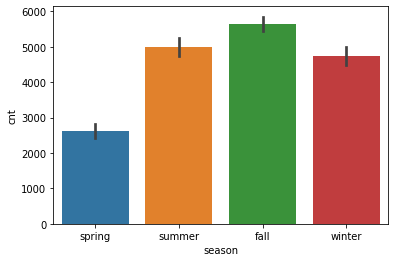

In [248]:
# Season column
sns.barplot(df['season'],df['cnt'])
plt.show()

Bike renting is more in fall season

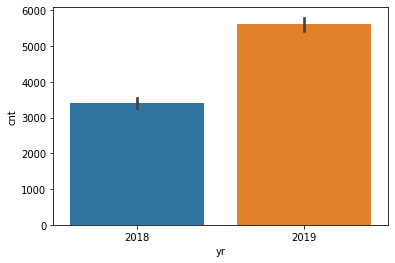

In [249]:
# year column
sns.barplot(df['yr'],df['cnt'])
plt.show()

Bike renting is more in 2019 year than that of in 2018 year

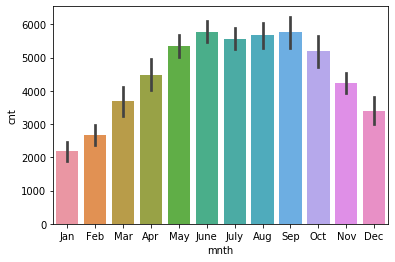

In [250]:
# month column
sns.barplot(df['mnth'],df['cnt'])
plt.show()

Bike renting is more in june and september months

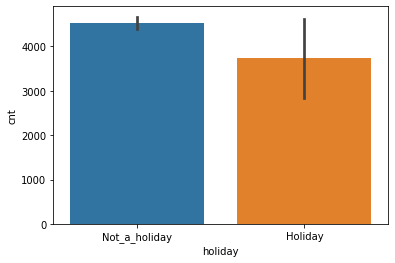

In [251]:
# holiday column
sns.barplot(df['holiday'],df['cnt'])
plt.show()

Bike rentals are less in holidays when compared to other days

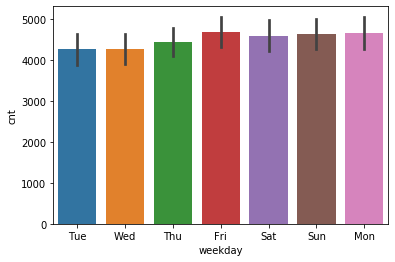

In [252]:
# weekday column
sns.barplot(df['weekday'],df['cnt'])
plt.show()

Bike rentals are more in Friday,Monday and Sunday

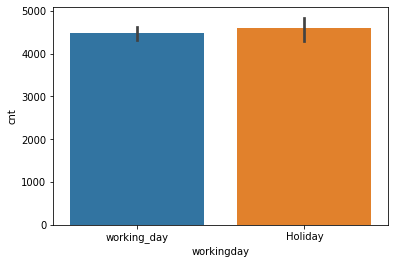

In [253]:
# working column
sns.barplot(df['workingday'],df['cnt'])
plt.show()

Bike rentals are more in Holidays when compared to working days

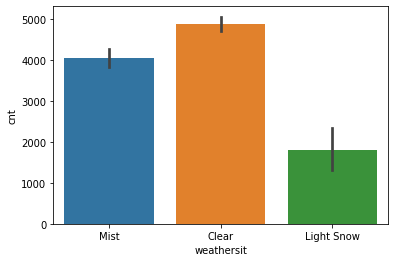

In [254]:
# weathersit column
sns.barplot(df['weathersit'],df['cnt'])
plt.show()

Bikes are more rented in Clear weather when compared to Mist,light snow

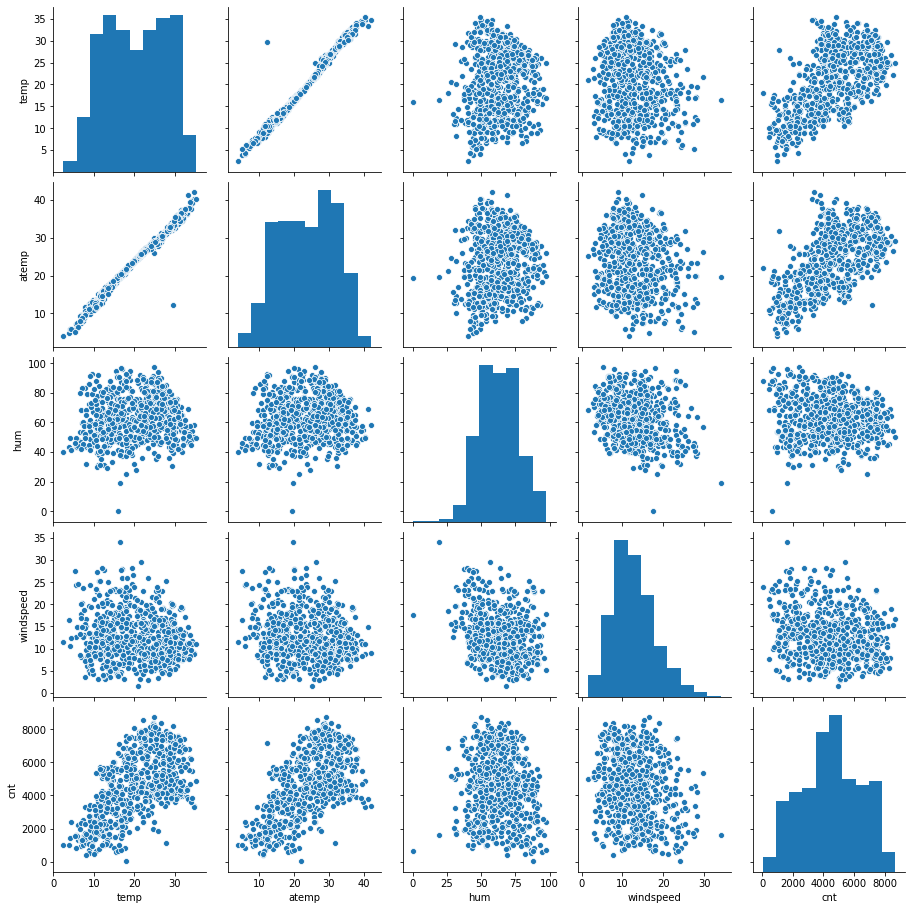

In [255]:
# Visualsing numerical variables
sns.pairplot(df[['temp','atemp','hum','windspeed',"cnt"]])
plt.show()

Some insights
- There is high relation between temp and atemp
- Bike rentals are observed at high temperatures
- Bike renting is mostly observed in the areas of high feel like temperatures
- Also more bike rentals are observed in the areas with high humidity

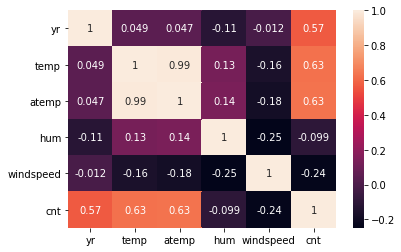

In [256]:
# Finding correlation matrix and plotting it as heat map
sns.heatmap(df.corr(),annot = True)
plt.show()

In [257]:
#By observing both pairplot and correlation matrix we can confirm that there is very high relation between temp and atemp therefore we can drop one
# Dropping temp column
df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Not_a_holiday,Tue,working_day,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Not_a_holiday,Wed,working_day,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Not_a_holiday,Thu,working_day,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Not_a_holiday,Fri,working_day,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Not_a_holiday,Sat,working_day,Clear,11.46350,43.6957,12.522300,1600


# CREATING DUMMY VARIABLES

In [258]:
# Creating dummy variables
month= pd.get_dummies(df['mnth'],drop_first=True)

working_day = pd.get_dummies(df['workingday'],drop_first=True)

week_day= pd.get_dummies(df['weekday'],drop_first=True)

weather = pd.get_dummies(df['weathersit'],drop_first=True)

seasons = pd.get_dummies(df['season'],drop_first=True)

year = pd.get_dummies(df['yr'],drop_first=True)

holiday_status = pd.get_dummies(df['holiday'],drop_first = True)

In [259]:
# oncatenating these created dummy variables
df=pd.concat([df,seasons],axis=1)
df=pd.concat([df,weather],axis=1)
df=pd.concat([df,week_day],axis=1)
df=pd.concat([df,month],axis=1)
df = pd.concat([df,working_day],axis = 1)
df = pd.concat([df,year],axis = 1)
df = pd.concat([df,holiday_status],axis = 1)

In [260]:
# Since we created dummy variables of the columns dropping those original columns
df.drop(['mnth','workingday','weekday','weathersit','season','yr','holiday'],axis = 1,inplace = True)
df.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Mon,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   atemp          730 non-null    float64
 1   hum            730 non-null    float64
 2   windspeed      730 non-null    float64
 3   cnt            730 non-null    int64  
 4   spring         730 non-null    uint8  
 5   summer         730 non-null    uint8  
 6   winter         730 non-null    uint8  
 7   Light Snow     730 non-null    uint8  
 8   Mist           730 non-null    uint8  
 9   Mon            730 non-null    uint8  
 10  Sat            730 non-null    uint8  
 11  Sun            730 non-null    uint8  
 12  Thu            730 non-null    uint8  
 13  Tue            730 non-null    uint8  
 14  Wed            730 non-null    uint8  
 15  Aug            730 non-null    uint8  
 16  Dec            730 non-null    uint8  
 17  Feb            730 non-null    uint8  
 18  Jan       

# SPLITTING DATA INTO TRAIN AND TEST SET

In [262]:
# Now we can split data to training and test sets
from sklearn.model_selection import train_test_split
# we use random seed function so that whenever this code is run we get same output
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [263]:
# checking train column
df_train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Mon,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,1
576,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
426,20.6746,62.1250,10.792293,4066,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,1
728,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
482,18.8752,48.9583,8.708325,4220,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1


In [264]:
# Checking test column
df_test.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Mon,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
184,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
535,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
299,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# SCALING THE NUMERICAL DATA

In [265]:
# Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical = ['cnt','windspeed','hum','atemp']
df_train[numerical] = scaler.fit_transform(df_train[numerical])

In [266]:
df_train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Mon,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
653,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,1
576,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
426,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,1
728,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
482,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1


In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   atemp          510 non-null    float64
 1   hum            510 non-null    float64
 2   windspeed      510 non-null    float64
 3   cnt            510 non-null    float64
 4   spring         510 non-null    uint8  
 5   summer         510 non-null    uint8  
 6   winter         510 non-null    uint8  
 7   Light Snow     510 non-null    uint8  
 8   Mist           510 non-null    uint8  
 9   Mon            510 non-null    uint8  
 10  Sat            510 non-null    uint8  
 11  Sun            510 non-null    uint8  
 12  Thu            510 non-null    uint8  
 13  Tue            510 non-null    uint8  
 14  Wed            510 non-null    uint8  
 15  Aug            510 non-null    uint8  
 16  Dec            510 non-null    uint8  
 17  Feb            510 non-null    uint8  
 18  Jan      

In [268]:
df_train.describe()

,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Mon,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.137255,...,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.711765,0.507843,0.974510
std,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.344454,...,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.453386,0.500429,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
# Creating X and y for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [270]:
X_train.head()

,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist,Mon,Sat,...,July,June,Mar,May,Nov,Oct,Sep,working_day,2019,Not_a_holiday
653,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
576,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
426,0.438975,0.640189,0.255342,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
728,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
482,0.391735,0.504508,0.188475,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [271]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## MODEL BUILDING USING RFE

In [272]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [273]:
lm = LinearRegression()
# fitting data
lm.fit(X_train, y_train)


rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 13),
 ('Sun', False, 3),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 8),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('working_day', False, 2),
 (2019, True, 1),
 ('Not_a_holiday', True, 1)]

In [274]:
# top 15 columns
top_15_columns = X_train.columns[rfe.support_]
top_15_columns

Index([        'atemp',           'hum',     'windspeed',        'summer',
              'winter',    'Light Snow',          'Mist',           'Aug',
                 'Dec',           'Feb',           'Jan',           'Nov',
                 'Sep',            2019, 'Not_a_holiday'],
      dtype='object')

In [275]:
X_train_RFE = X_train[top_15_columns]

## MODEL BUILDING USING STATS MODEL

## MODEL1

In [276]:
import statsmodels.api as sm  
X_train_model_1 = sm.add_constant(X_train_RFE)
lm_model_1 = sm.OLS(y_train,X_train_model_1).fit()
print(lm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.26e-186
Time:                        19:34:34   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2098      0.041      5.126

We see that all p values are less than 0.05 

In [277]:
# Finding Variance inflation factor for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,30.76
14,Not_a_holiday,24.21
0,atemp,16.40
2,windspeed,4.50
4,winter,3.08
3,summer,2.34
6,Mist,2.27
10,Jan,2.09
13,2019,2.08
11,Nov,1.83


We see that variable hum has very high VIF therefore we will drop variable because in real world scenario more humid air has less wind speed and less humid air has more speed generally. Since there is a relation between these two ,one of the variables must be dropped and since humidity has high VIF we drop it

In [278]:
X_train_RFE =X_train_RFE.drop(['hum'],axis=1)
X_train_RFE.head()

,atemp,windspeed,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Nov,Sep,2019,Not_a_holiday
653,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0,1,1
576,0.766351,0.264686,0,0,0,0,0,0,0,0,0,0,1,1
426,0.438975,0.255342,0,0,0,1,0,0,0,0,0,0,1,1
728,0.200348,0.663106,0,0,0,0,0,1,0,0,0,0,1,1
482,0.391735,0.188475,1,0,0,1,0,0,0,0,0,0,1,1


# MODEL 2

In [279]:
import statsmodels.api as sm  
X_train_model_2 = sm.add_constant(X_train_RFE)
lm_model_2 = sm.OLS(y_train,X_train_model_2).fit()
print(lm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          7.00e-184
Time:                        19:34:50   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1263      0.037      3.451

We see that all p values are less than 0.05

In [280]:
# Finding Variance inflation factor for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Not_a_holiday,19.76
0,atemp,11.68
1,windspeed,4.49
3,winter,2.83
2,summer,2.22
12,2019,2.07
9,Jan,1.79
10,Nov,1.79
6,Aug,1.60
5,Mist,1.59


Column Not_a_holiday has a very high VIF so we drop it

In [281]:
X_train_RFE =X_train_RFE.drop(['Not_a_holiday'],axis=1)
X_train_RFE.head()

,atemp,windspeed,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Nov,Sep,2019
653,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0,1
576,0.766351,0.264686,0,0,0,0,0,0,0,0,0,0,1
426,0.438975,0.255342,0,0,0,1,0,0,0,0,0,0,1
728,0.200348,0.663106,0,0,0,0,0,1,0,0,0,0,1
482,0.391735,0.188475,1,0,0,1,0,0,0,0,0,0,1


## MODEL 3

In [282]:
import statsmodels.api as sm  
X_train_model_3 = sm.add_constant(X_train_RFE)
lm_model_3 = sm.OLS(y_train,X_train_model_3).fit()
print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          8.45e-183
Time:                        19:34:57   Log-Likelihood:                 493.98
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     496   BIC:                            -900.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2109      0.026      8.185      0.0

We see that all variables have p value less than 0.05

In [283]:
# Finding Variance inflation factor for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,4.99
1,windspeed,3.83
3,winter,2.62
12,2019,2.06
2,summer,2.04
10,Nov,1.78
6,Aug,1.59
5,Mist,1.56
7,Dec,1.40
11,Sep,1.34


We see that all VIFs are less than 5 therefore we can stop here

# RESIDUAL ANALYSIS (VALIDATING ASSUMPTIONS OF LINEAR REGRESSION)

Text(0.5, 0, 'Errors')

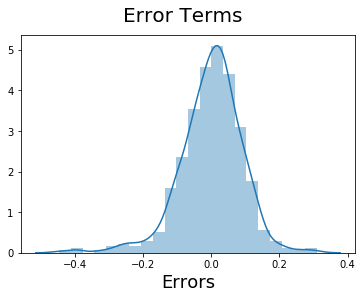

In [284]:
# Checking whether errors are normally distributed or not
y_train_model_3 = lm_model_3.predict(X_train_model_3)
fig = plt.figure()
sns.distplot((y_train - y_train_model_3), bins = 22)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

Residuals or Errors are normally distributed

Therefore we can rely on this model

In [285]:
# Checking whether independent variables of the final model have relationship between them or not
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,4.99
1,windspeed,3.83
3,winter,2.62
12,2019,2.06
2,summer,2.04
10,Nov,1.78
6,Aug,1.59
5,Mist,1.56
7,Dec,1.40
11,Sep,1.34


From the VIF table we can also validate one more assumption that is variables should be independent of each other

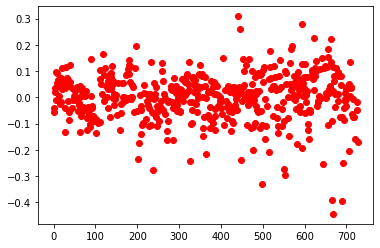

In [286]:
plt.plot((y_train - y_train_model_3),'ro')
plt.show()

Points to infer
- Also we can see residuals are independent of each other that there is no relation between them therefore we can validate one more assuption that residuals must be independent of each other
- Also from the plot we can see that there is a constant variance therefore validating another assumption that residuals should have constant variance

All assumptions are valid therfore we can now go to prediction

# MODEL PREDICTION USING FINAL MODEL

In [287]:
# applying scaling to all numeric variables
# also we will use transform function and not fit transform function as fit is used for training set to learn parameters 
# and transform is done on test set thereform transformation of test set is done based on the parameters learnt from train set

numerical = ['cnt','windspeed','hum','atemp']
df_test[numerical] = scaler.transform(df_test[numerical])

In [288]:
# Dividing into x and y test
y_test = df_test.pop('cnt')
X_test = df_test

In [289]:
# Creating X_test_new dataframe by dropping variables from X_test which are inferred significant from the final model that is model 3
X_test_new = X_test[X_train_RFE.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [290]:
# Making predictions
y_pred = lm_model_3.predict(X_test_new)

# MODEL EVALUATION

Text(0, 0.5, 'y_pred')

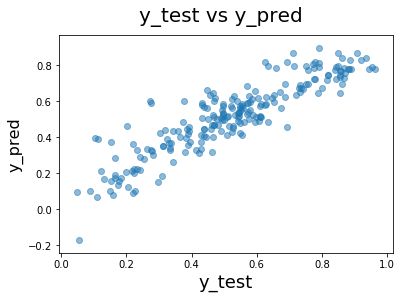

In [291]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

From the above plot we can see that y test and y pred are very close to each other and there are significant number of overlaps between them which tells us that model is good enough to predict demand for bikes count

## R squared value for Test set

In [292]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8049235919028004

R squared value of train set is 0.832 and R squared value of test set is 0.804. The difference between them is less than 0.05 (5 percent) therefore we can be confident that the model predictions are well and can be relied upon

# FINAL MODEL INTERPRETATION 

In [293]:
print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          8.45e-183
Time:                        19:35:16   Log-Likelihood:                 493.98
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     496   BIC:                            -900.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2109      0.026      8.185      0.0

We have enough evidence from the p values of coefficients that all are small enough to reject null hypothesis (which assumes coefficient is equal to zero)

F statistics is used to check the overall significance of the model. Here p value of F statistic is very very less therefore the model we got is significant enough and we have enough evidence to reject null hypothesis (intercept model)

The equation of best fitted line is as follows: <br>
cnt = 0.4424Xatemp - 0.1507xwindspeed + 0.0724Xsummer + 0.1248Xwinter - 0.2844XLightSnow - 0.0815XMist + 0.0588XAug - 0.0603XDec - 0.0609XFeb - 0.0909XJan - 0.0517XNov + 0.1007XSep + 0.2352X2019 + 0.2109

We can see that demand for bike rentals mostly depend on the following variables:
- atemp
- windspeed
- summer
- winter
- lightsnow
- mist
- Aug
- Dec
- Feb
- Jan
- Nov
- Sep
- 2019

Also the top 5 predictors based on the model are :
- atemp
- Lightsnow
- windspeed
- winter
- Sep

Interpretation of Coefficients:
- An increase of 1 unit in atemp increases bike rentals by 0.4424 units
- An increase of 1 unit in windspeed decreases bike rentals by 0.1507 units
- In summer season there will be increase of 0.0724 units of bike rentals
- In winter season there will be increase of 0.1248 units of bike rentals
- In lightsnow weather there will be decrease of 0.2844 units of bike rentals
- In Mist weather there will be decrease of 0.0815 units of bike rentals
- In August month there will be increase of 0.0588 units of bike rentals
- In December month there will be decrease of 0.0603 units of bike rentals
- In february month there will be decrease of 0.0609 units of bike rentals
- In january month there will be decrease of 0.0909 units of bike rentals
- In November month there will be decrease of 0.0517 units of bike rentals
- In september month there will be increase of 0.1007 units of bike rentals
- In the year 2019 there is an increase of 0.2352 units of bike rentals

Final Recommendations to the company :
- Demand increases for bike rentals in months of August and september
- Demand decreases for bike rentals in months of December,February,January,November 
- Demand for bike rentals will be more when season is either summer or winter
- Demand for bike rentals will be less when weather is either Mist or Light Snow
- Demand for bike rentals will be more if there is less wind speed
- Demand for bike rentals will be more if there is less feel like temperature